In [1]:
import warnings
import os
warnings.filterwarnings('ignore')
os.chdir('game-behavior-analytics/data_analysis_notebook/')

In [6]:
import pandas as pd
import numpy as np

# Load the original dataset
print("Loading final_dataset.csv...")
df = pd.read_csv('../data/final_dataset.csv')

# Clean column names
df.columns = df.columns.str.strip()

print(f"Original dataset shape: {df.shape}")
print(f"Original columns: {len(df.columns)}")

# Select and rename columns
clean_df = pd.DataFrame()

# Add columns with original names
clean_df['participant_id'] = df['participant_id']
clean_df['age'] = df['age']
clean_df['gender'] = df['gender']
clean_df['ethnicity'] = df['ethnicity']
clean_df['native_language'] = df['native_language']
clean_df['highest_education'] = df['highest_education']
clean_df['online_tests_taken_last_3_years'] = df['online_tests_taken_last_3_years']
clean_df['motivational_message_id'] = df['motivational_message_id']
clean_df['concept'] = df['concept']
clean_df['theory'] = df['theory']

# Add renamed columns
clean_df['perceived_ability'] = df['word_creation_skill_level']
clean_df['cheating_behavior'] = df['cheating_rate_main_round']
clean_df['performance'] = df['performance_score_including_cheated_words']

# Create new 'experience' column by averaging task_engagement and task_satisfaction
print("\nCreating 'experience' column...")
clean_df['experience'] = (df['task_engagement'] + df['task_satisfaction']) / 2

# Add more renamed columns
clean_df['perceived_honesty'] = df['PME_on_honest_task_completion']
clean_df['perceived_performance'] = df['PME_on_task_performance']
clean_df['perceived_experience'] = df['PME_on_task_experience']

# Add Self-Determination Theory variables
clean_df['autonomy_need_satisfaction'] = df['autonomy_need_satisfaction']
clean_df['autonomy_need_frustration'] = df['autonomy_need_frustration']
clean_df['competence_need_satisfaction'] = df['competence_need_satisfaction']
clean_df['competence_need_frustration'] = df['competence_need_frustration']
clean_df['relatedness_need_satisfaction'] = df['relatedness_need_satisfaction']
clean_df['relatedness_need_frustration'] = df['relatedness_need_frustration']

# Add Self-Efficacy Theory variables
clean_df['performance_accomplishments'] = df['performance_accomplishments']
clean_df['vicarious_experience'] = df['vicarious_experience']
clean_df['verbal_persuasion'] = df['verbal_persuasion']
clean_df['emotional_arousal'] = df['emotional_arousal']

# Add Social Norms Theory variables
clean_df['injunctive_norms'] = df['injunctive_norms']
clean_df['descriptive_norms'] = df['descriptive_norms']
clean_df['reference_group_identification'] = df['reference_group_identification']
clean_df['social_sanctions'] = df['social_sanctions']

# Add Cognitive Dissonance Theory variables
clean_df['cognitive_discomfort'] = df['cognitive_discomfort']
clean_df['moral_disengagement'] = df['moral_disengagement']

# Drop participants with missing age
rows_before = len(clean_df)
clean_df = clean_df[clean_df['age'].notna()].copy()
rows_after = len(clean_df)
rows_dropped = rows_before - rows_after

print(f"Dropped {rows_dropped} participants with missing age")
print(f"\nClean dataset shape: {clean_df.shape}")
print(f"Clean dataset columns: {len(clean_df.columns)}")

# Display column information
print("\n" + "="*80)
print("COLUMN INFORMATION")
print("="*80)
print(f"\n{'Column Name':<40} {'Non-Null Count':<15} {'Dtype'}")
print("-"*80)
for col in clean_df.columns:
    non_null = clean_df[col].notna().sum()
    dtype = clean_df[col].dtype
    print(f"{col:<40} {non_null:<15} {dtype}")

# Display summary statistics for key numeric variables
print("\n" + "="*80)
print("SUMMARY STATISTICS FOR KEY VARIABLES")
print("="*80)

key_vars = [
    'perceived_ability', 'cheating_behavior', 'performance', 'experience',
    'perceived_honesty', 'perceived_performance', 'perceived_experience'
]

for var in key_vars:
    print(f"\n{var}:")
    print(f"  Count: {clean_df[var].notna().sum()}")
    print(f"  Mean: {clean_df[var].mean():.3f}")
    print(f"  Std: {clean_df[var].std():.3f}")
    print(f"  Min: {clean_df[var].min():.3f}")
    print(f"  Max: {clean_df[var].max():.3f}")

# Check for missing values
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_counts = clean_df.isnull().sum()
missing_percent = (missing_counts / len(clean_df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_percent
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df.to_string())
else:
    print("\nNo missing values found!")

# Display distribution of categorical variables
print("\n" + "="*80)
print("CATEGORICAL VARIABLE DISTRIBUTIONS")
print("="*80)

categorical_vars = ['theory', 'concept', 'gender']

for var in categorical_vars:
    if var in clean_df.columns:
        print(f"\n{var}:")
        value_counts = clean_df[var].value_counts()
        for value, count in value_counts.items():
            percent = (count / len(clean_df)) * 100
            print(f"  {value}: {count} ({percent:.1f}%)")

# Save the clean dataset
output_file = 'data/cheating_experiment_dataset.csv'
clean_df.to_csv(output_file, index=False)

print("\n" + "="*80)
print("DATASET SAVED")
print("="*80)
print(f"\nClean dataset saved as: {output_file}")
print(f"Total rows: {len(clean_df)}")
print(f"Total columns: {len(clean_df.columns)}")

# Display first few rows
print("\n" + "="*80)
print("PREVIEW OF CLEAN DATASET (First 5 rows)")
print("="*80)
print(clean_df.head().to_string())

# Create a data dictionary
print("\n" + "="*80)
print("DATA DICTIONARY")
print("="*80)

data_dict = {
    'participant_id': 'Unique participant identifier',
    'age': 'Age of participant',
    'gender': 'Gender of participant',
    'ethnicity': 'Ethnicity of participant',
    'native_language': 'Native language of participant',
    'highest_education': 'Highest level of education completed',
    'online_tests_taken_last_3_years': 'Number of online tests taken in last 3 years',
    'motivational_message_id': 'ID of the motivational message shown',
    'concept': 'Intervention concept used',
    'theory': 'Theoretical framework of intervention',
    'perceived_ability': 'Self-rated word creation skill level (1-10)',
    'cheating_behavior': 'Cheating rate in main round (0-1)',
    'performance': 'Performance score including cheated words',
    'experience': 'Average of task engagement and satisfaction (1-7)',
    'perceived_honesty': 'Perceived message effect on honest task completion (1-7)',
    'perceived_performance': 'Perceived message effect on task performance (1-7)',
    'perceived_experience': 'Perceived message effect on task experience (1-7)',
    'autonomy_need_satisfaction': 'Satisfaction of autonomy need (1-7)',
    'autonomy_need_frustration': 'Frustration of autonomy need (1-7)',
    'competence_need_satisfaction': 'Satisfaction of competence need (1-7)',
    'competence_need_frustration': 'Frustration of competence need (1-7)',
    'relatedness_need_satisfaction': 'Satisfaction of relatedness need (1-7)',
    'relatedness_need_frustration': 'Frustration of relatedness need (1-7)',
    'performance_accomplishments': 'Self-efficacy from past performance (1-7)',
    'vicarious_experience': 'Self-efficacy from observing others (1-7)',
    'verbal_persuasion': 'Self-efficacy from verbal encouragement (1-7)',
    'emotional_arousal': 'Self-efficacy from emotional state (1-7)',
    'injunctive_norms': 'Perceived approval/disapproval of behavior (1-7)',
    'descriptive_norms': 'Perceived prevalence of behavior (1-7)',
    'reference_group_identification': 'Identification with reference group (1-7)',
    'social_sanctions': 'Perceived social consequences (1-7)',
    'cognitive_discomfort': 'Discomfort from attitude-behavior discrepancy (1-7)',
    'moral_disengagement': 'Mechanisms to justify unethical behavior (1-7)'
}

print("\n")
for col, description in data_dict.items():
    print(f"{col}:")
    print(f"  {description}\n")

# Save data dictionary
dict_df = pd.DataFrame(list(data_dict.items()), columns=['Variable', 'Description'])
dict_df.to_csv('data/data_dictionary.csv', index=False)
print(f"Data dictionary saved as: data_dictionary.csv")

print("\n" + "="*80)
print("CLEANING COMPLETE!")
print("="*80)

Loading final_dataset.csv...
Original dataset shape: (1282, 62)
Original columns: 62

Creating 'experience' column...
Dropped 50 participants with missing age

Clean dataset shape: (1232, 33)
Clean dataset columns: 33

COLUMN INFORMATION

Column Name                              Non-Null Count  Dtype
--------------------------------------------------------------------------------
participant_id                           1232            object
age                                      1232            float64
gender                                   1232            object
ethnicity                                1232            object
native_language                          1232            object
highest_education                        1232            object
online_tests_taken_last_3_years          1232            float64
motivational_message_id                  1232            object
concept                                  1232            object
theory                                 

PME Variables Data Availability:
✓ PME_on_honest_task_completion: 1232 valid responses
✓ PME_on_task_performance: 1232 valid responses
✓ PME_on_task_experience: 1232 valid responses

Calculated effects for PME_on_honest_task_completion: 15 concepts

Calculated effects for PME_on_task_performance: 15 concepts

Calculated effects for PME_on_task_experience: 15 concepts

PME DESCRIPTIVE STATISTICS BY CONCEPT

PME_ON_HONEST_TASK_COMPLETION:
------------------------------------------------------------
Control (n=73): M=2.98, SD=1.46
Autonomy                            (n=76): M=3.70, SD=1.59 [Self-Determination Theory]
Cognitive Inconsistency             (n=76): M=3.47, SD=1.47 [Cognitive Dissonance Theory]
Competence                          (n=77): M=3.59, SD=1.67 [Self-Determination Theory]
Descriptive Norms                   (n=80): M=3.47, SD=1.29 [Social Norms Theory]
Dissonance Arousal                  (n=77): M=3.52, SD=1.48 [Cognitive Dissonance Theory]
Dissonance Reduction        

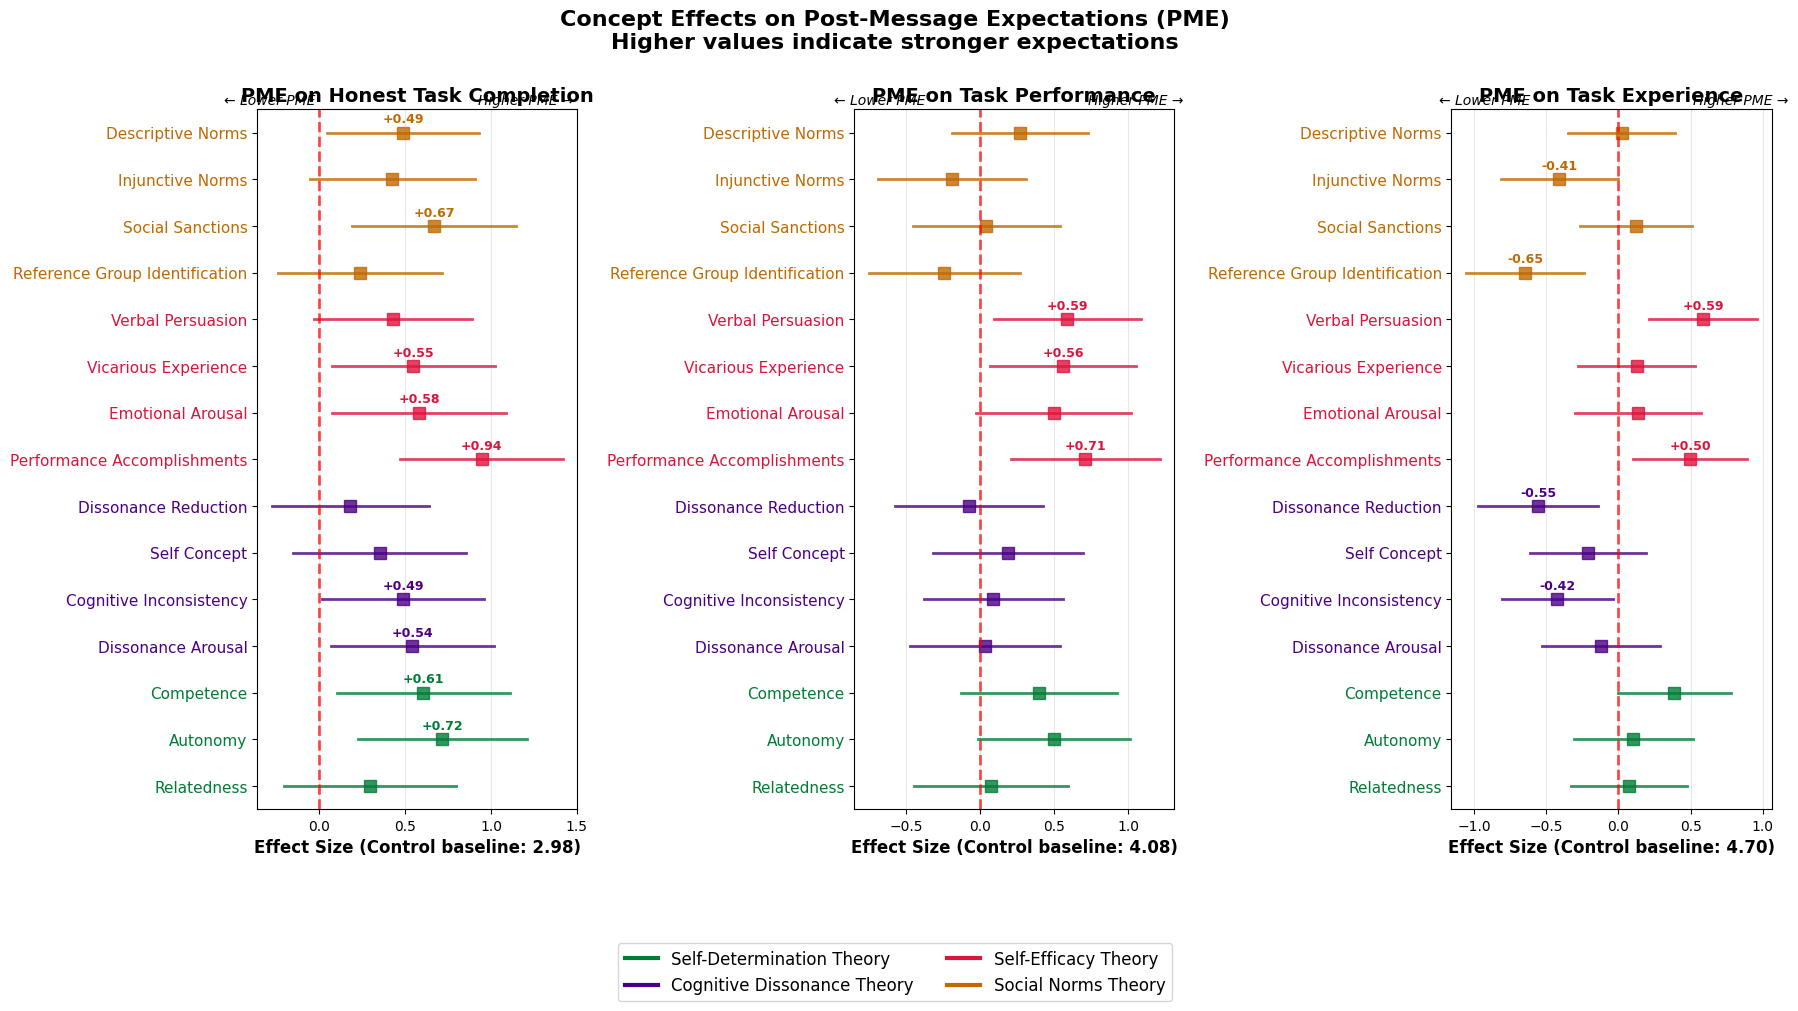


SIGNIFICANT PME EFFECTS (95% CI excludes zero)
                 PME Variable                        Concept                      Theory Effect Size           95% CI p-value
Pme On Honest Task Completion    Performance Accomplishments        Self-Efficacy Theory      +0.945 [+0.472, +1.417]   0.000
Pme On Honest Task Completion              Emotional Arousal        Self-Efficacy Theory      +0.581 [+0.074, +1.088]   0.026
Pme On Honest Task Completion             Dissonance Arousal Cognitive Dissonance Theory      +0.542 [+0.068, +1.016]   0.025
Pme On Honest Task Completion               Social Sanctions         Social Norms Theory      +0.669 [+0.192, +1.146]   0.006
Pme On Honest Task Completion                       Autonomy   Self-Determination Theory      +0.716 [+0.223, +1.209]   0.005
Pme On Honest Task Completion                     Competence   Self-Determination Theory      +0.607 [+0.102, +1.112]   0.019
Pme On Honest Task Completion        Cognitive Inconsistency Cognitive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os
warnings.filterwarnings('ignore')
os.chdir('game-behavior-analytics/data_analysis_notebook/')

# Load and prepare data
df = pd.read_csv('../data/final_dataset.csv')

# Create concept variable if needed
if 'concept' not in df.columns:
    df['concept'] = df['motivational_message_id'].str.replace(r'_\d+$', '', regex=True)
    control_mask = df['theory'].str.contains('control', case=False, na=False)
    df.loc[control_mask, 'concept'] = 'control'

# PME variables to analyze
pme_vars = [
    'PME_on_honest_task_completion',
    'PME_on_task_performance', 
    'PME_on_task_experience'
]

# Check data availability
print("PME Variables Data Availability:")
for var in pme_vars:
    if var in df.columns:
        n_valid = df[var].notna().sum()
        print(f"✓ {var}: {n_valid} valid responses")
    else:
        print(f"✗ {var}: Not found in dataset")

# Theory mapping for colors
theory_map = {
    'autonomy': 'Self-Determination Theory', 'competence': 'Self-Determination Theory', 'relatedness': 'Self-Determination Theory',
    'self_concept': 'Cognitive Dissonance Theory', 'cognitive_inconsistency': 'Cognitive Dissonance Theory', 
    'dissonance_arousal': 'Cognitive Dissonance Theory', 'dissonance_reduction': 'Cognitive Dissonance Theory',
    'performance_accomplishments': 'Self-Efficacy Theory', 'vicarious_experience': 'Self-Efficacy Theory', 
    'verbal_persuasion': 'Self-Efficacy Theory', 'emotional_arousal': 'Self-Efficacy Theory',
    'descriptive_norms': 'Social Norms Theory', 'injunctive_norms': 'Social Norms Theory', 
    'social_sanctions': 'Social Norms Theory', 'reference_group_identification': 'Social Norms Theory',
    'control': 'Control Group'
}

theory_colors = {
    'Self-Determination Theory': '#007C36',
    'Cognitive Dissonance Theory': '#4B0082', 
    'Self-Efficacy Theory': '#DC143C',
    'Social Norms Theory': '#C06900',
    'Control Group': '#808080'
}

# Calculate concept effects for each PME variable
def calculate_concept_effects(df, outcome_var):
    """Calculate effect sizes and confidence intervals for each concept vs control"""
    
    control_data = df[(df['concept'] == 'control') & df[outcome_var].notna()]
    results = []
    
    concepts = [c for c in df['concept'].unique() if c != 'control' and not pd.isna(c)]
    
    for concept in concepts:
        concept_data = df[(df['concept'] == concept) & df[outcome_var].notna()]
        
        if len(concept_data) >= 5 and len(control_data) >= 5:  # Minimum sample size
            
            # Calculate means and effect size
            control_mean = control_data[outcome_var].mean()
            concept_mean = concept_data[outcome_var].mean()
            effect_size = concept_mean - control_mean
            
            # Calculate 95% confidence interval using t-test
            t_stat, p_val = stats.ttest_ind(concept_data[outcome_var], control_data[outcome_var])
            
            # Pooled standard error
            control_se = control_data[outcome_var].std() / np.sqrt(len(control_data))
            concept_se = concept_data[outcome_var].std() / np.sqrt(len(concept_data))
            pooled_se = np.sqrt(control_se**2 + concept_se**2)
            
            # 95% CI
            df_pooled = len(control_data) + len(concept_data) - 2
            t_crit = stats.t.ppf(0.975, df_pooled)
            ci_low = effect_size - t_crit * pooled_se
            ci_high = effect_size + t_crit * pooled_se
            
            results.append({
                'concept': concept,
                'concept_label': concept.replace('_', ' ').title(),
                'theory': theory_map.get(concept, 'Unknown'),
                'n': len(concept_data),
                'control_mean': control_mean,
                'concept_mean': concept_mean,
                'effect_size': effect_size,
                'ci_low': ci_low,
                'ci_high': ci_high,
                'p_value': p_val
            })
    
    return pd.DataFrame(results)

# Calculate effects for all PME variables
pme_results = {}
for var in pme_vars:
    if var in df.columns:
        pme_results[var] = calculate_concept_effects(df, var)
        print(f"\nCalculated effects for {var}: {len(pme_results[var])} concepts")

# Create forest plots for PME effects
def plot_pme_effects():
    """Create forest plots for PME concept effects"""
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 10))
    
    pme_labels = [
        'PME on Honest Task Completion',
        'PME on Task Performance', 
        'PME on Task Experience'
    ]
    
    for idx, (var, label) in enumerate(zip(pme_vars, pme_labels)):
        ax = axes[idx]
        
        if var not in pme_results or pme_results[var].empty:
            ax.text(0.5, 0.5, 'No Data\nAvailable', ha='center', va='center', 
                   transform=ax.transAxes, fontsize=14)
            ax.set_title(label, fontweight='bold', fontsize=14)
            ax.axis('off')
            continue
            
        results_df = pme_results[var].copy()
        
        # Sort by theory for grouping
        theory_order = ['Self-Determination Theory', 'Cognitive Dissonance Theory', 
                       'Self-Efficacy Theory', 'Social Norms Theory']
        results_df['theory_cat'] = pd.Categorical(results_df['theory'], 
                                                 categories=theory_order, ordered=True)
        results_df = results_df.sort_values('theory_cat').reset_index(drop=True)
        
        y_positions = np.arange(len(results_df))
        
        # Plot effects with confidence intervals
        for i, row in results_df.iterrows():
            color = theory_colors.get(row['theory'], '#808080')
            
            # Plot CI line and point
            ax.plot([row['ci_low'], row['ci_high']], [i, i], 
                   color=color, linewidth=2, alpha=0.8)
            ax.plot(row['effect_size'], i, 's', 
                   color=color, markersize=8, alpha=0.8)
            
            # Add value label for significant effects (CI doesn't cross 0)
            if row['ci_low'] > 0 or row['ci_high'] < 0:
                ax.text(row['effect_size'], i + 0.15, f'{row["effect_size"]:+.2f}', 
                       ha='center', va='bottom', fontweight='bold', 
                       fontsize=9, color=color)
        
        # Formatting
        ax.axvline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
        ax.set_yticks(y_positions)
        ax.set_yticklabels(results_df['concept_label'], fontsize=11)
        
        # Color y-tick labels by theory
        for tick_label, theory in zip(ax.get_yticklabels(), results_df['theory']):
            tick_label.set_color(theory_colors.get(theory, '#000000'))
        
        # Get control baseline for context
        control_data = df[(df['concept'] == 'control') & df[var].notna()]
        if len(control_data) > 0:
            control_mean = control_data[var].mean()
            ax.set_xlabel(f'Effect Size (Control baseline: {control_mean:.2f})', 
                         fontsize=12, fontweight='bold')
        else:
            ax.set_xlabel('Effect Size vs Control', fontsize=12, fontweight='bold')
            
        ax.set_title(label, fontweight='bold', fontsize=14)
        ax.grid(True, alpha=0.3, axis='x')
        ax.set_ylim(-0.5, len(results_df) - 0.5)
        
        # Add interpretation arrows
        xlim = ax.get_xlim()
        ax.text(xlim[0] * 0.8, len(results_df) - 0.3, '← Lower PME', 
               ha='center', va='center', fontsize=10, style='italic')
        ax.text(xlim[1] * 0.8, len(results_df) - 0.3, 'Higher PME →', 
               ha='center', va='center', fontsize=10, style='italic')
    
    # Add legend
    legend_elements = [plt.Line2D([0], [0], color=color, lw=3, label=theory) 
                      for theory, color in theory_colors.items() 
                      if theory != 'Control Group']
    
    fig.legend(handles=legend_elements, loc='lower center', 
              bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)
    
    plt.suptitle('Concept Effects on Post-Message Expectations (PME)\nHigher values indicate stronger expectations', 
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15, top=0.85)
    plt.show()

# Create descriptive statistics table
def print_pme_descriptive_stats():
    """Print descriptive statistics for PME variables"""
    
    print("\n" + "="*100)
    print("PME DESCRIPTIVE STATISTICS BY CONCEPT")
    print("="*100)
    
    for var in pme_vars:
        if var not in df.columns:
            continue
            
        print(f"\n{var.upper()}:")
        print("-" * 60)
        
        # Control group stats
        control_data = df[(df['concept'] == 'control') & df[var].notna()]
        if len(control_data) > 0:
            print(f"Control (n={len(control_data)}): "
                  f"M={control_data[var].mean():.2f}, "
                  f"SD={control_data[var].std():.2f}")
        
        # Intervention concepts
        concepts = [c for c in df['concept'].unique() if c != 'control' and not pd.isna(c)]
        for concept in sorted(concepts):
            concept_data = df[(df['concept'] == concept) & df[var].notna()]
            if len(concept_data) >= 5:
                theory = theory_map.get(concept, 'Unknown')
                print(f"{concept.replace('_', ' ').title():35} (n={len(concept_data):2d}): "
                      f"M={concept_data[var].mean():.2f}, "
                      f"SD={concept_data[var].std():.2f} [{theory}]")

# Create summary table of significant effects
def print_significant_effects():
    """Print table of statistically significant effects"""
    
    print("\n" + "="*120)
    print("SIGNIFICANT PME EFFECTS (95% CI excludes zero)")
    print("="*120)
    
    sig_effects = []
    
    for var in pme_vars:
        if var in pme_results and not pme_results[var].empty:
            var_results = pme_results[var]
            
            # Find significant effects
            significant = var_results[
                (var_results['ci_low'] > 0) | (var_results['ci_high'] < 0)
            ]
            
            for _, row in significant.iterrows():
                sig_effects.append({
                    'PME Variable': var.replace('_', ' ').title(),
                    'Concept': row['concept_label'],
                    'Theory': row['theory'],
                    'Effect Size': f"{row['effect_size']:+.3f}",
                    '95% CI': f"[{row['ci_low']:+.3f}, {row['ci_high']:+.3f}]",
                    'p-value': f"{row['p_value']:.3f}"
                })
    
    if sig_effects:
        sig_df = pd.DataFrame(sig_effects)
        print(sig_df.to_string(index=False))
    else:
        print("No statistically significant effects found (all 95% CIs include zero)")

# Execute the analysis
if __name__ == "__main__":
    # Print descriptive statistics
    print_pme_descriptive_stats()
    
    # Create forest plots
    plot_pme_effects()
    
    # Print significant effects
    print_significant_effects()
    
    print(f"\n✓ PME analysis completed for {len([v for v in pme_vars if v in df.columns])} variables")

In [2]:
# Calculate lying about cheating among cheaters
lying_analysis = df[df['cheating_rate_main_round'] > 0].copy()
total_cheaters = len(lying_analysis)
liars = (lying_analysis['cheating_lying_rate'] > 0).sum()

print("="*60)
print("CHEATING DISCLOSURE ANALYSIS")
print("="*60)
print(f"Total cheaters (cheating_rate > 0): {total_cheaters}")
print(f"Cheaters who lied (cheating_lying_rate > 0): {liars}")
print(f"Lying rate among cheaters: {liars/total_cheaters*100:.1f}%")
print(f"Honest disclosure rate: {(total_cheaters-liars)/total_cheaters*100:.1f}%")

CHEATING DISCLOSURE ANALYSIS
Total cheaters (cheating_rate > 0): 473
Cheaters who lied (cheating_lying_rate > 0): 453
Lying rate among cheaters: 95.8%
Honest disclosure rate: 4.2%


In [10]:
# =============================================================================
# CRONBACH'S ALPHA CALCULATION FOR ALL SCALES
# =============================================================================

from sklearn.preprocessing import scale
import numpy as np
import pandas as pd

df_raw = pd.read_csv('../data/combined_dataset.csv')

def cronbach_alpha(data):
    """Calculate Cronbach's alpha for reliability assessment"""
    data_clean = data.dropna()
    if len(data_clean) < 10:
        return np.nan
    
    item_vars = data_clean.var(axis=0, ddof=1)
    total_var = data_clean.sum(axis=1).var(ddof=1)
    n_items = data_clean.shape[1]
    
    alpha = (n_items / (n_items - 1)) * (1 - item_vars.sum() / total_var)
    return alpha

# Define scale compositions
scales = {
    'Engagement': ['Engagement_1', 'Engagement_2', 'Engagement_3', 'Engagement_4', 
                   'Engagement_5', 'Engagement_6', 'Engagement_7', 'Engagement_8'],
    'Satisfaction': ['Satisfaction_1', 'Satisfaction_2', 'Satisfaction_3', 
                     'Satisfaction_4', 'Satisfaction_5'],
    'PME Honest Playing': ['PME_honest_playing_1', 'PME_honest_playing_2', 'PME_honest_playing_3'],
    'PME Performance': ['PME_performance_1', 'PME_performance_2', 'PME_performance_3', 
                        'PME_performance_4', 'PME_performance_5'],
    'PME UX': ['PME_UX_1', 'PME_UX_2', 'PME_UX_3'],
    'PME SDT Need Satisfaction': ['PME_aut_sat_1', 'PME_com_sat_1', 'PME_rel_sat_1', 
                                  'PME_aut_sat_2', 'PME_com_sat_2', 'PME_rel_sat_2'],
    'PME SDT Need Frustration': ['PME_aut_fru_1', 'PME_com_fru_1', 'PME_rel_fru_1',
                                 'PME_aut_fru_2', 'PME_com_fru_2', 'PME_rel_fru_2'],
    'PME Self-Efficacy': ['PME_efficacy_PA_1', 'PME_efficacy_VE_1', 'PME_efficacy_VP_1', 
                         'PME_efficacy_EA_1', 'PME_efficacy_PA_2', 'PME_efficacy_VE_2', 
                         'PME_efficacy_EA_2', 'PME_efficacy_VP_2'],
    'PME Social Norms': ['PME_inj_norm_1', 'PME_des_norm_1', 'PME_inj_norm_2', 'PME_ref_norm_1', 
                        'PME_sanc_norm_1', 'PME_des_norm_2', 'PME_sanc_norm_2', 'PME_ref_norm_2'],
    'PME Cognitive Dissonance': ['PME_dissonance_1', 'PME_dissonance_2', 'PME_dissonance_3', 
                                'PME_dissonance_4', 'PME_dissonance_5', 'PME_dissonance_6', 
                                'PME_dissonance_7', 'PME_dissonance_8', 'PME_dissonance_9'],
    'PME Moral Disengagement': ['PME_disengagement_1', 'PME_disengagement_2', 'PME_disengagement_3', 
                               'PME_disengagement_4', 'PME_disengagement_5', 'PME_disengagement_6']
}

# Calculate Cronbach's alpha for each scale
results = []
for scale_name, items in scales.items():
    available_items = [item for item in items if item in df.columns]
    if available_items:
        alpha = cronbach_alpha(df[available_items])
        results.append({
            'Scale': scale_name,
            'n_items': len(available_items),
            'Cronbach α': f'{alpha:.3f}' if not pd.isna(alpha) else 'N/A'
        })

# Display results
alpha_df = pd.DataFrame(results)
print("\n" + "="*60)
print("CRONBACH'S ALPHA RELIABILITY COEFFICIENTS")
print("="*60)
print(alpha_df.to_string(index=False))
print("="*60)
print("\nInterpretation:")
print("  α ≥ 0.90: Excellent")
print("  α ≥ 0.80: Good")
print("  α ≥ 0.70: Acceptable")
print("  α ≥ 0.60: Questionable")
print("  α < 0.60: Poor")


CRONBACH'S ALPHA RELIABILITY COEFFICIENTS
                    Scale  n_items Cronbach α
               Engagement        8      0.817
             Satisfaction        5      0.867
       PME Honest Playing        3      0.813
          PME Performance        5      0.930
                   PME UX        3      0.837
PME SDT Need Satisfaction        6      0.737
 PME SDT Need Frustration        6      0.779
        PME Self-Efficacy        8      0.930
         PME Social Norms        8      0.891
 PME Cognitive Dissonance        9      0.862
  PME Moral Disengagement        6      0.864

Interpretation:
  α ≥ 0.90: Excellent
  α ≥ 0.80: Good
  α ≥ 0.70: Acceptable
  α ≥ 0.60: Questionable
  α < 0.60: Poor


In [3]:
# =============================================================================
# DEMOGRAPHIC DISTRIBUTIONS ANALYSIS
# =============================================================================

def analyze_demographic_distributions(df):
    """Calculate and display distributions for key demographic variables"""
    
    print("\n" + "="*80)
    print("DEMOGRAPHIC DISTRIBUTIONS")
    print("="*80)
    
    # 1. Gender Distribution
    print("\n1. GENDER DISTRIBUTION")
    print("-" * 40)
    if 'gender' in df.columns:
        gender_counts = df['gender'].value_counts(dropna=False)
        gender_props = df['gender'].value_counts(normalize=True, dropna=False) * 100
        
        print(f"Total participants with gender data: {df['gender'].notna().sum()}")
        for gender in gender_counts.index:
            count = gender_counts[gender]
            prop = gender_props[gender]
            print(f"  {gender}: {count:4d} ({prop:5.1f}%)")
    else:
        print("  Gender variable not found in dataset")
    
    # 2. Educational Background Distribution
    print("\n2. EDUCATIONAL BACKGROUND DISTRIBUTION")
    print("-" * 50)
    if 'highest_education' in df.columns:
        edu_counts = df['highest_education'].value_counts(dropna=False)
        edu_props = df['highest_education'].value_counts(normalize=True, dropna=False) * 100
        
        print(f"Total participants with education data: {df['highest_education'].notna().sum()}")
        for education in edu_counts.index:
            count = edu_counts[education]
            prop = edu_props[education]
            print(f"  {education}: {count:4d} ({prop:5.1f}%)")
    else:
        print("  Education variable not found in dataset")
    
    # 3. Online Tests Taken in Last 3 Years Distribution
    print("\n3. ONLINE TESTS TAKEN IN LAST 3 YEARS")
    print("-" * 45)
    if 'online_tests_taken_last_3_years' in df.columns:
        # Remove NaN values for analysis
        online_tests = df['online_tests_taken_last_3_years'].dropna()
        
        print(f"Total participants with online test data: {len(online_tests)}")
        print(f"Mean: {online_tests.mean():.2f}")
        print(f"Median: {online_tests.median():.2f}")
        print(f"Standard Deviation: {online_tests.std():.2f}")
        print(f"Min: {online_tests.min():.0f}, Max: {online_tests.max():.0f}")
        
        # Create frequency distribution for ranges
        print("\nFrequency Distribution:")
        bins = [0, 1, 3, 5, 10, float('inf')]
        labels = ['0 tests', '1-2 tests', '3-4 tests', '5-9 tests', '10+ tests']
        
        online_test_bins = pd.cut(online_tests, bins=bins, labels=labels, right=False)
        bin_counts = online_test_bins.value_counts()
        bin_props = online_test_bins.value_counts(normalize=True) * 100
        
        for category in bin_counts.index:
            count = bin_counts[category]
            prop = bin_props[category]
            print(f"  {category}: {count:4d} ({prop:5.1f}%)")
    else:
        print("  Online tests variable not found in dataset")
    
    print("\n" + "="*80)

# Execute the demographic analysis
analyze_demographic_distributions(df)


DEMOGRAPHIC DISTRIBUTIONS

1. GENDER DISTRIBUTION
----------------------------------------
Total participants with gender data: 1232
  Female:  626 ( 48.8%)
  Male:  582 ( 45.4%)
  nan:   50 (  3.9%)
  Prefer not to answer:   11 (  0.9%)
  Non-binary:   10 (  0.8%)
  Trans-gender:    2 (  0.2%)
  trans female:    1 (  0.1%)

2. EDUCATIONAL BACKGROUND DISTRIBUTION
--------------------------------------------------
Total participants with education data: 1232
  Bachelor’s degree:  521 ( 40.6%)
  Master’s degree:  281 ( 21.9%)
  High school graduate, diploma or the equivalent (for example: GED):  134 ( 10.5%)
  Some college credit, no degree:  119 (  9.3%)
  Trade/technical/vocational training:   77 (  6.0%)
  nan:   50 (  3.9%)
  Doctorate degree:   32 (  2.5%)
  Some high school, no diploma:   23 (  1.8%)
  Professional degree:   21 (  1.6%)
  Associate degree:   16 (  1.2%)
  A-level:    2 (  0.2%)
  student (BSc):    1 (  0.1%)
  Some university:    1 (  0.1%)
  College Degree (UK): 

In [ ]:
# PME Analysis by Cheating Group

# Create cheating behavior categories
df['cheating_behavior'] = df['cheating_rate_main_round'].apply(
    lambda x: 0 if x == 0 else (2 if x == 1 else 1)  # 0=non, 1=partial, 2=full
)

pme_vars = [
    'PME_on_honest_task_completion',
    'PME_on_task_performance', 
    'PME_on_task_experience'
]

cheating_labels = {0: 'Non-cheaters', 1: 'Partial cheaters', 2: 'Full cheaters'}

# Calculate concept effects by cheating group
def calculate_effects_by_cheating_group(df, outcome_var):
    """Calculate concept effects separately for each cheating group"""
    results = {}
    
    for cheat_group in [0, 1, 2]:
        group_results = []
        group_data = df[df['cheating_behavior'] == cheat_group]
        
        control_data = group_data[(group_data['concept'] == 'control') & group_data[outcome_var].notna()]
        
        if len(control_data) < 5:  # Skip if insufficient control data
            continue
            
        concepts = [c for c in df['concept'].unique() if c != 'control' and not pd.isna(c)]
        
        for concept in concepts:
            concept_data = group_data[(group_data['concept'] == concept) & group_data[outcome_var].notna()]
            
            if len(concept_data) >= 3:  # Minimum sample
                control_mean = control_data[outcome_var].mean()
                concept_mean = concept_data[outcome_var].mean()
                effect_size = concept_mean - control_mean
                
                # Simple t-test
                try:
                    t_stat, p_val = stats.ttest_ind(concept_data[outcome_var], control_data[outcome_var])
                    
                    group_results.append({
                        'concept': concept,
                        'concept_label': concept.replace('_', ' ').title(),
                        'theory': theory_map.get(concept, 'Unknown'),
                        'n': len(concept_data),
                        'effect_size': effect_size,
                        'p_value': p_val,
                        'significant': p_val < 0.05
                    })
                except:
                    continue
        
        if group_results:
            results[cheat_group] = pd.DataFrame(group_results)
    
    return results

# Calculate for all PME variables
pme_by_group = {}
for var in pme_vars:
    if var in df.columns:
        pme_by_group[var] = calculate_effects_by_cheating_group(df, var)

# Create plots
def plot_pme_by_cheating_groups():
    """Forest plots showing PME effects by cheating behavior groups"""
    
    fig, axes = plt.subplots(3, 3, figsize=(18, 14))
    
    pme_labels = [
        'PME: Honest Task Completion',
        'PME: Task Performance',
        'PME: Task Experience'
    ]
    
    for row, (var, pme_label) in enumerate(zip(pme_vars, pme_labels)):
        if var not in pme_by_group:
            for col in range(3):
                axes[row, col].text(0.5, 0.5, 'No Data', ha='center', va='center', transform=axes[row, col].transAxes)
                axes[row, col].set_title(f'{pme_label}\n{cheating_labels[col]}')
            continue
            
        for col, cheat_group in enumerate([0, 1, 2]):
            ax = axes[row, col]
            
            if cheat_group not in pme_by_group[var] or pme_by_group[var][cheat_group].empty:
                ax.text(0.5, 0.5, 'Insufficient\nData', ha='center', va='center', transform=ax.transAxes, fontsize=10)
                ax.set_title(f'{pme_label}\n{cheating_labels[cheat_group]}', fontsize=11)
                ax.axis('off')
                continue
            
            results_df = pme_by_group[var][cheat_group].copy()
            results_df = results_df.sort_values('effect_size', ascending=True)
            
            y_positions = np.arange(len(results_df))
            
            # Plot effects
            for i, row_data in results_df.iterrows():
                color = theory_colors.get(row_data['theory'], '#808080')
                alpha = 1.0 if row_data['significant'] else 0.5
                marker = 's' if row_data['significant'] else 'o'
                
                ax.plot(row_data['effect_size'], i, marker, 
                       color=color, markersize=8, alpha=alpha)
                
                # Label significant effects
                if row_data['significant']:
                    ax.text(row_data['effect_size'], i + 0.1, f'{row_data["effect_size"]:+.2f}', 
                           ha='center', va='bottom', fontweight='bold', fontsize=8, color=color)
            
            ax.axvline(0, color='red', linestyle='--', alpha=0.7)
            ax.set_yticks(y_positions)
            ax.set_yticklabels(results_df['concept_label'], fontsize=9)
            
            # Color labels by theory
            for tick_label, theory in zip(ax.get_yticklabels(), results_df['theory']):
                tick_label.set_color(theory_colors.get(theory, '#000000'))
            
            ax.set_title(f'{pme_label}\n{cheating_labels[cheat_group]}', fontsize=11, fontweight='bold')
            ax.grid(True, alpha=0.3, axis='x')
            ax.set_xlabel('Effect Size', fontsize=10)
            
            # Sample sizes in corner
            total_n = results_df['n'].sum()
            ax.text(0.02, 0.98, f'Total n={total_n}', transform=ax.transAxes, 
                   fontsize=8, va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    # Legend
    legend_elements = [
        plt.Line2D([0], [0], marker='s', color=color, lw=0, markersize=8, label=theory)
        for theory, color in theory_colors.items() if theory != 'Control Group'
    ]
    legend_elements.extend([
        plt.Line2D([0], [0], marker='s', color='black', lw=0, markersize=8, label='Significant (p<0.05)'),
        plt.Line2D([0], [0], marker='o', color='gray', lw=0, markersize=8, alpha=0.5, label='Non-significant')
    ])
    
    fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=3, fontsize=10)
    
    plt.suptitle('Post-Message Expectations by Cheating Behavior Groups\nHigher values = stronger expectations', 
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1, top=0.88)
    plt.show()

# Summary table
def print_significant_effects_by_group():
    print("SIGNIFICANT PME EFFECTS BY CHEATING GROUP")
    print("="*60)
    
    for var in pme_vars:
        if var not in pme_by_group:
            continue
            
        print(f"\n{var.replace('_', ' ').upper()}:")
        
        has_effects = False
        for cheat_group in [0, 1, 2]:
            if cheat_group in pme_by_group[var]:
                significant = pme_by_group[var][cheat_group][pme_by_group[var][cheat_group]['significant']]
                if not significant.empty:
                    has_effects = True
                    print(f"\n{cheating_labels[cheat_group]}:")
                    for _, row in significant.iterrows():
                        print(f"  {row['concept_label']:25} {row['effect_size']:+.3f} (p={row['p_value']:.3f})")
        
        if not has_effects:
            print("  No significant effects")

# Execute
plot_pme_by_cheating_groups()
print_significant_effects_by_group()

print(f"\n✓ PME by cheating group analysis completed")

In [ ]:
# Need Satisfaction Analysis - reusing existing functions and structure

# Need satisfaction variables to analyze
need_vars = [
    'autonomy_need_satisfaction',
    'autonomy_need_frustration', 
    'competence_need_satisfaction',
    'competence_need_frustration',
    'relatedness_need_satisfaction',
    'relatedness_need_frustration'
]

# Check data availability
print("Need Satisfaction Variables Data Availability:")
for var in need_vars:
    if var in df.columns:
        n_valid = df[var].notna().sum()
        print(f"✓ {var}: {n_valid} valid responses")
    else:
        print(f"✗ {var}: Not found in dataset")

# Calculate effects for all need satisfaction variables (reusing existing function)
need_results = {}
for var in need_vars:
    if var in df.columns:
        need_results[var] = calculate_concept_effects(df, var)
        print(f"\nCalculated effects for {var}: {len(need_results[var])} concepts")

# Create forest plots for Need Satisfaction effects
def plot_need_satisfaction_effects():
    """Create forest plots for Need Satisfaction concept effects"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    need_labels = [
        'Autonomy Need Satisfaction',
        'Autonomy Need Frustration',
        'Competence Need Satisfaction', 
        'Competence Need Frustration',
        'Relatedness Need Satisfaction',
        'Relatedness Need Frustration'
    ]
    
    for idx, (var, label) in enumerate(zip(need_vars, need_labels)):
        ax = axes[idx]
        
        if var not in need_results or need_results[var].empty:
            ax.text(0.5, 0.5, 'No Data\nAvailable', ha='center', va='center', 
                   transform=ax.transAxes, fontsize=12)
            ax.set_title(label, fontweight='bold', fontsize=12)
            ax.axis('off')
            continue
            
        results_df = need_results[var].copy()
        
        # Sort by theory for grouping (reusing existing theory order)
        theory_order = ['Self-Determination Theory', 'Cognitive Dissonance Theory', 
                       'Self-Efficacy Theory', 'Social Norms Theory']
        results_df['theory_cat'] = pd.Categorical(results_df['theory'], 
                                                 categories=theory_order, ordered=True)
        results_df = results_df.sort_values('theory_cat').reset_index(drop=True)
        
        y_positions = np.arange(len(results_df))
        
        # Plot effects with confidence intervals (reusing plot structure)
        for i, row in results_df.iterrows():
            color = theory_colors.get(row['theory'], '#808080')
            
            ax.plot([row['ci_low'], row['ci_high']], [i, i], 
                   color=color, linewidth=2, alpha=0.8)
            ax.plot(row['effect_size'], i, 's', 
                   color=color, markersize=6, alpha=0.8)
            
            # Add value label for significant effects
            if row['ci_low'] > 0 or row['ci_high'] < 0:
                ax.text(row['effect_size'], i + 0.1, f'{row["effect_size"]:+.2f}', 
                       ha='center', va='bottom', fontweight='bold', 
                       fontsize=8, color=color)
        
        # Formatting (reusing existing style)
        ax.axvline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
        ax.set_yticks(y_positions)
        ax.set_yticklabels(results_df['concept_label'], fontsize=9)
        
        # Color y-tick labels by theory
        for tick_label, theory in zip(ax.get_yticklabels(), results_df['theory']):
            tick_label.set_color(theory_colors.get(theory, '#000000'))
        
        # Control baseline context
        control_data = df[(df['concept'] == 'control') & df[var].notna()]
        if len(control_data) > 0:
            control_mean = control_data[var].mean()
            ax.set_xlabel(f'Effect Size (Control: {control_mean:.2f})', 
                         fontsize=10, fontweight='bold')
        else:
            ax.set_xlabel('Effect Size vs Control', fontsize=10, fontweight='bold')
            
        ax.set_title(label, fontweight='bold', fontsize=11)
        ax.grid(True, alpha=0.3, axis='x')
        ax.set_ylim(-0.5, len(results_df) - 0.5)
        
        # Interpretation arrows
        xlim = ax.get_xlim()
        direction = 'Lower' if 'frustration' in var else 'Lower'
        opposite = 'Higher' if 'frustration' in var else 'Higher'
        ax.text(xlim[0] * 0.8, len(results_df) - 0.3, f'← {direction}', 
               ha='center', va='center', fontsize=9, style='italic')
        ax.text(xlim[1] * 0.8, len(results_df) - 0.3, f'{opposite} →', 
               ha='center', va='center', fontsize=9, style='italic')
    
    # Reuse legend from existing plots
    legend_elements = [plt.Line2D([0], [0], color=color, lw=3, label=theory) 
                      for theory, color in theory_colors.items() 
                      if theory != 'Control Group']
    
    fig.legend(handles=legend_elements, loc='lower center', 
              bbox_to_anchor=(0.5, -0.02), ncol=2, fontsize=11)
    
    plt.suptitle('Concept Effects on Need Satisfaction and Frustration\nHigher satisfaction = better, Lower frustration = better', 
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1, top=0.88)
    plt.show()

# Print descriptive stats (reusing structure but adapted for need vars)
def print_need_descriptive_stats():
    print("\n" + "="*100)
    print("NEED SATISFACTION DESCRIPTIVE STATISTICS BY CONCEPT")
    print("="*100)
    
    for var in need_vars:
        if var not in df.columns:
            continue
            
        print(f"\n{var.upper().replace('_', ' ')}:")
        print("-" * 60)
        
        # Control stats
        control_data = df[(df['concept'] == 'control') & df[var].notna()]
        if len(control_data) > 0:
            print(f"Control (n={len(control_data)}): "
                  f"M={control_data[var].mean():.2f}, "
                  f"SD={control_data[var].std():.2f}")
        
        # Top 5 most effective concepts for this variable
        if var in need_results and not need_results[var].empty:
            top_concepts = need_results[var].nlargest(5, 'effect_size') if 'satisfaction' in var else need_results[var].nsmallest(5, 'effect_size')
            print("Top 5 most effective concepts:")
            for _, row in top_concepts.iterrows():
                print(f"  {row['concept_label']:25} {row['effect_size']:+.2f} [{row['theory']}]")

# Print significant effects (reusing function structure)
def print_need_significant_effects():
    print("\n" + "="*120)
    print("SIGNIFICANT NEED SATISFACTION EFFECTS (95% CI excludes zero)")
    print("="*120)
    
    sig_effects = []
    
    for var in need_vars:
        if var in need_results and not need_results[var].empty:
            var_results = need_results[var]
            
            significant = var_results[
                (var_results['ci_low'] > 0) | (var_results['ci_high'] < 0)
            ]
            
            for _, row in significant.iterrows():
                sig_effects.append({
                    'Need Variable': var.replace('_', ' ').title(),
                    'Concept': row['concept_label'],
                    'Theory': row['theory'],
                    'Effect Size': f"{row['effect_size']:+.3f}",
                    '95% CI': f"[{row['ci_low']:+.3f}, {row['ci_high']:+.3f}]",
                    'Direction': 'Beneficial' if (('satisfaction' in var and row['effect_size'] > 0) or 
                                                 ('frustration' in var and row['effect_size'] < 0)) else 'Detrimental'
                })
    
    if sig_effects:
        sig_df = pd.DataFrame(sig_effects)
        print(sig_df.to_string(index=False))
    else:
        print("No statistically significant effects found")

# Execute analysis
print_need_descriptive_stats()
plot_need_satisfaction_effects()
print_need_significant_effects()

print(f"\n✓ Need satisfaction analysis completed for {len([v for v in need_vars if v in df.columns])} variables")

In [ ]:
# Self-Efficacy Variables Analysis - reusing existing functions

# Self-efficacy variables
efficacy_vars = [
    'performance_accomplishments',
    'vicarious_experience',
    'verbal_persuasion',
    'emotional_arousal'
]

# Check availability
print("Self-Efficacy Variables Data Availability:")
for var in efficacy_vars:
    if var in df.columns:
        n_valid = df[var].notna().sum()
        print(f"✓ {var}: {n_valid} valid responses")

# Calculate effects (reusing existing function)
efficacy_results = {}
for var in efficacy_vars:
    if var in df.columns:
        efficacy_results[var] = calculate_concept_effects(df, var)

# Create plots
def plot_efficacy_effects():
    """Forest plots for self-efficacy variables"""
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    efficacy_labels = [
        'Performance Accomplishments',
        'Vicarious Experience', 
        'Verbal Persuasion',
        'Emotional Arousal'
    ]
    
    for idx, (var, label) in enumerate(zip(efficacy_vars, efficacy_labels)):
        ax = axes[idx]
        
        if var not in efficacy_results or efficacy_results[var].empty:
            ax.text(0.5, 0.5, 'No Data\nAvailable', ha='center', va='center', 
                   transform=ax.transAxes, fontsize=12)
            ax.set_title(label, fontweight='bold', fontsize=12)
            ax.axis('off')
            continue
            
        results_df = efficacy_results[var].copy()
        
        # Sort by theory (reusing existing order)
        theory_order = ['Self-Determination Theory', 'Cognitive Dissonance Theory', 
                       'Self-Efficacy Theory', 'Social Norms Theory']
        results_df['theory_cat'] = pd.Categorical(results_df['theory'], 
                                                 categories=theory_order, ordered=True)
        results_df = results_df.sort_values('theory_cat').reset_index(drop=True)
        
        y_positions = np.arange(len(results_df))
        
        # Plot effects (reusing style)
        for i, row in results_df.iterrows():
            color = theory_colors.get(row['theory'], '#808080')
            
            ax.plot([row['ci_low'], row['ci_high']], [i, i], 
                   color=color, linewidth=2, alpha=0.8)
            ax.plot(row['effect_size'], i, 's', 
                   color=color, markersize=7, alpha=0.8)
            
            # Significant effects labels
            if row['ci_low'] > 0 or row['ci_high'] < 0:
                ax.text(row['effect_size'], i + 0.1, f'{row["effect_size"]:+.2f}', 
                       ha='center', va='bottom', fontweight='bold', 
                       fontsize=9, color=color)
        
        # Formatting (reusing existing style)
        ax.axvline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
        ax.set_yticks(y_positions)
        ax.set_yticklabels(results_df['concept_label'], fontsize=10)
        
        # Color labels by theory
        for tick_label, theory in zip(ax.get_yticklabels(), results_df['theory']):
            tick_label.set_color(theory_colors.get(theory, '#000000'))
        
        # Control baseline
        control_data = df[(df['concept'] == 'control') & df[var].notna()]
        if len(control_data) > 0:
            control_mean = control_data[var].mean()
            ax.set_xlabel(f'Effect Size (Control: {control_mean:.2f})', 
                         fontsize=11, fontweight='bold')
        else:
            ax.set_xlabel('Effect Size vs Control', fontsize=11, fontweight='bold')
            
        ax.set_title(label, fontweight='bold', fontsize=12)
        ax.grid(True, alpha=0.3, axis='x')
        ax.set_ylim(-0.5, len(results_df) - 0.5)
        
        # Interpretation arrows
        xlim = ax.get_xlim()
        ax.text(xlim[0] * 0.8, len(results_df) - 0.3, '← Lower', 
               ha='center', va='center', fontsize=10, style='italic')
        ax.text(xlim[1] * 0.8, len(results_df) - 0.3, 'Higher →', 
               ha='center', va='center', fontsize=10, style='italic')
    
    # Legend (reusing)
    legend_elements = [plt.Line2D([0], [0], color=color, lw=3, label=theory) 
                      for theory, color in theory_colors.items() 
                      if theory != 'Control Group']
    
    fig.legend(handles=legend_elements, loc='lower center', 
              bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=11)
    
    plt.suptitle('Concept Effects on Self-Efficacy Variables\nHigher values indicate stronger self-efficacy beliefs', 
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12, top=0.88)
    plt.show()

# Descriptive stats
def print_efficacy_stats():
    print("\n" + "="*100)
    print("SELF-EFFICACY VARIABLES DESCRIPTIVE STATISTICS")
    print("="*100)
    
    for var in efficacy_vars:
        if var not in df.columns:
            continue
            
        print(f"\n{var.upper().replace('_', ' ')}:")
        print("-" * 50)
        
        # Control
        control_data = df[(df['concept'] == 'control') & df[var].notna()]
        if len(control_data) > 0:
            print(f"Control (n={len(control_data)}): "
                  f"M={control_data[var].mean():.2f}, "
                  f"SD={control_data[var].std():.2f}")
        
        # Top 3 concepts
        if var in efficacy_results and not efficacy_results[var].empty:
            top_concepts = efficacy_results[var].nlargest(3, 'effect_size')
            print("Top 3 concepts:")
            for _, row in top_concepts.iterrows():
                print(f"  {row['concept_label']:25} {row['effect_size']:+.2f}")

# Significant effects
def print_efficacy_significant():
    print("\n" + "="*100)
    print("SIGNIFICANT SELF-EFFICACY EFFECTS")
    print("="*100)
    
    sig_count = 0
    for var in efficacy_vars:
        if var in efficacy_results and not efficacy_results[var].empty:
            significant = efficacy_results[var][
                (efficacy_results[var]['ci_low'] > 0) | 
                (efficacy_results[var]['ci_high'] < 0)
            ]
            
            if not significant.empty:
                print(f"\n{var.replace('_', ' ').title()}:")
                for _, row in significant.iterrows():
                    print(f"  {row['concept_label']:25} {row['effect_size']:+.3f} "
                          f"[{row['ci_low']:+.3f}, {row['ci_high']:+.3f}]")
                sig_count += len(significant)
    
    if sig_count == 0:
        print("No statistically significant effects found")

# Execute
print_efficacy_stats()
plot_efficacy_effects()
print_efficacy_significant()

print(f"\n✓ Self-efficacy analysis completed for {len([v for v in efficacy_vars if v in df.columns])} variables")

In [ ]:
# Social Norms Variables Analysis - reusing existing functions

# Social norms variables
norms_vars = [
    'injunctive_norms',
    'descriptive_norms', 
    'reference_group_identification',
    'social_sanctions'
]

# Check availability
print("Social Norms Variables Data Availability:")
for var in norms_vars:
    if var in df.columns:
        n_valid = df[var].notna().sum()
        print(f"✓ {var}: {n_valid} valid responses")

# Calculate effects (reusing existing function)
norms_results = {}
for var in norms_vars:
    if var in df.columns:
        norms_results[var] = calculate_concept_effects(df, var)

# Create plots
def plot_norms_effects():
    """Forest plots for social norms variables"""
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    norms_labels = [
        'Injunctive Norms',
        'Descriptive Norms',
        'Reference Group Identification', 
        'Social Sanctions'
    ]
    
    for idx, (var, label) in enumerate(zip(norms_vars, norms_labels)):
        ax = axes[idx]
        
        if var not in norms_results or norms_results[var].empty:
            ax.text(0.5, 0.5, 'No Data\nAvailable', ha='center', va='center', 
                   transform=ax.transAxes, fontsize=12)
            ax.set_title(label, fontweight='bold', fontsize=12)
            ax.axis('off')
            continue
            
        results_df = norms_results[var].copy()
        
        # Sort by theory (reusing existing order)
        theory_order = ['Self-Determination Theory', 'Cognitive Dissonance Theory', 
                       'Self-Efficacy Theory', 'Social Norms Theory']
        results_df['theory_cat'] = pd.Categorical(results_df['theory'], 
                                                 categories=theory_order, ordered=True)
        results_df = results_df.sort_values('theory_cat').reset_index(drop=True)
        
        y_positions = np.arange(len(results_df))
        
        # Plot effects (reusing style)
        for i, row in results_df.iterrows():
            color = theory_colors.get(row['theory'], '#808080')
            
            ax.plot([row['ci_low'], row['ci_high']], [i, i], 
                   color=color, linewidth=2, alpha=0.8)
            ax.plot(row['effect_size'], i, 's', 
                   color=color, markersize=7, alpha=0.8)
            
            # Significant effects labels
            if row['ci_low'] > 0 or row['ci_high'] < 0:
                ax.text(row['effect_size'], i + 0.1, f'{row["effect_size"]:+.2f}', 
                       ha='center', va='bottom', fontweight='bold', 
                       fontsize=9, color=color)
        
        # Formatting (reusing existing style)
        ax.axvline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
        ax.set_yticks(y_positions)
        ax.set_yticklabels(results_df['concept_label'], fontsize=10)
        
        # Color labels by theory
        for tick_label, theory in zip(ax.get_yticklabels(), results_df['theory']):
            tick_label.set_color(theory_colors.get(theory, '#000000'))
        
        # Control baseline
        control_data = df[(df['concept'] == 'control') & df[var].notna()]
        if len(control_data) > 0:
            control_mean = control_data[var].mean()
            ax.set_xlabel(f'Effect Size (Control: {control_mean:.2f})', 
                         fontsize=11, fontweight='bold')
        else:
            ax.set_xlabel('Effect Size vs Control', fontsize=11, fontweight='bold')
            
        ax.set_title(label, fontweight='bold', fontsize=12)
        ax.grid(True, alpha=0.3, axis='x')
        ax.set_ylim(-0.5, len(results_df) - 0.5)
        
        # Interpretation arrows
        xlim = ax.get_xlim()
        ax.text(xlim[0] * 0.8, len(results_df) - 0.3, '← Lower', 
               ha='center', va='center', fontsize=10, style='italic')
        ax.text(xlim[1] * 0.8, len(results_df) - 0.3, 'Higher →', 
               ha='center', va='center', fontsize=10, style='italic')
    
    # Legend (reusing)
    legend_elements = [plt.Line2D([0], [0], color=color, lw=3, label=theory) 
                      for theory, color in theory_colors.items() 
                      if theory != 'Control Group']
    
    fig.legend(handles=legend_elements, loc='lower center', 
              bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=11)
    
    plt.suptitle('Concept Effects on Social Norms Variables\nHigher values indicate stronger social norm perceptions', 
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12, top=0.88)
    plt.show()

# Descriptive stats
def print_norms_stats():
    print("\n" + "="*100)
    print("SOCIAL NORMS VARIABLES DESCRIPTIVE STATISTICS")
    print("="*100)
    
    for var in norms_vars:
        if var not in df.columns:
            continue
            
        print(f"\n{var.upper().replace('_', ' ')}:")
        print("-" * 50)
        
        # Control
        control_data = df[(df['concept'] == 'control') & df[var].notna()]
        if len(control_data) > 0:
            print(f"Control (n={len(control_data)}): "
                  f"M={control_data[var].mean():.2f}, "
                  f"SD={control_data[var].std():.2f}")
        
        # Top 3 concepts
        if var in norms_results and not norms_results[var].empty:
            top_concepts = norms_results[var].nlargest(3, 'effect_size')
            print("Top 3 concepts:")
            for _, row in top_concepts.iterrows():
                print(f"  {row['concept_label']:25} {row['effect_size']:+.2f}")

# Significant effects
def print_norms_significant():
    print("\n" + "="*100)
    print("SIGNIFICANT SOCIAL NORMS EFFECTS")
    print("="*100)
    
    sig_count = 0
    for var in norms_vars:
        if var in norms_results and not norms_results[var].empty:
            significant = norms_results[var][
                (norms_results[var]['ci_low'] > 0) | 
                (norms_results[var]['ci_high'] < 0)
            ]
            
            if not significant.empty:
                print(f"\n{var.replace('_', ' ').title()}:")
                for _, row in significant.iterrows():
                    print(f"  {row['concept_label']:25} {row['effect_size']:+.3f} "
                          f"[{row['ci_low']:+.3f}, {row['ci_high']:+.3f}]")
                sig_count += len(significant)
    
    if sig_count == 0:
        print("No statistically significant effects found")

# Execute
print_norms_stats()
plot_norms_effects()
print_norms_significant()

print(f"\n✓ Social norms analysis completed for {len([v for v in norms_vars if v in df.columns])} variables")

In [ ]:
# Cognitive Discomfort & Moral Disengagement Analysis

# Variables
cognitive_vars = [
    'cognitive_discomfort',
    'moral_disengagement'
]

# Check availability
print("Cognitive Variables Data Availability:")
for var in cognitive_vars:
    if var in df.columns:
        n_valid = df[var].notna().sum()
        print(f"✓ {var}: {n_valid} valid responses")

# Calculate effects
cognitive_results = {}
for var in cognitive_vars:
    if var in df.columns:
        cognitive_results[var] = calculate_concept_effects(df, var)

# Create plots
def plot_cognitive_effects():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    cognitive_labels = [
        'Cognitive Discomfort',
        'Moral Disengagement'
    ]
    
    for idx, (var, label) in enumerate(zip(cognitive_vars, cognitive_labels)):
        ax = axes[idx]
        
        if var not in cognitive_results or cognitive_results[var].empty:
            ax.text(0.5, 0.5, 'No Data\nAvailable', ha='center', va='center', 
                   transform=ax.transAxes, fontsize=12)
            ax.set_title(label, fontweight='bold', fontsize=12)
            ax.axis('off')
            continue
            
        results_df = cognitive_results[var].copy()
        
        # Sort by theory
        theory_order = ['Self-Determination Theory', 'Cognitive Dissonance Theory', 
                       'Self-Efficacy Theory', 'Social Norms Theory']
        results_df['theory_cat'] = pd.Categorical(results_df['theory'], 
                                                 categories=theory_order, ordered=True)
        results_df = results_df.sort_values('theory_cat').reset_index(drop=True)
        
        y_positions = np.arange(len(results_df))
        
        # Plot effects
        for i, row in results_df.iterrows():
            color = theory_colors.get(row['theory'], '#808080')
            
            ax.plot([row['ci_low'], row['ci_high']], [i, i], 
                   color=color, linewidth=2, alpha=0.8)
            ax.plot(row['effect_size'], i, 's', 
                   color=color, markersize=8, alpha=0.8)
            
            # Significant effects
            if row['ci_low'] > 0 or row['ci_high'] < 0:
                ax.text(row['effect_size'], i + 0.1, f'{row["effect_size"]:+.2f}', 
                       ha='center', va='bottom', fontweight='bold', 
                       fontsize=9, color=color)
        
        # Formatting
        ax.axvline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
        ax.set_yticks(y_positions)
        ax.set_yticklabels(results_df['concept_label'], fontsize=11)
        
        # Color labels by theory
        for tick_label, theory in zip(ax.get_yticklabels(), results_df['theory']):
            tick_label.set_color(theory_colors.get(theory, '#000000'))
        
        # Control baseline
        control_data = df[(df['concept'] == 'control') & df[var].notna()]
        if len(control_data) > 0:
            control_mean = control_data[var].mean()
            ax.set_xlabel(f'Effect Size (Control: {control_mean:.2f})', 
                         fontsize=12, fontweight='bold')
        else:
            ax.set_xlabel('Effect Size vs Control', fontsize=12, fontweight='bold')
            
        ax.set_title(label, fontweight='bold', fontsize=14)
        ax.grid(True, alpha=0.3, axis='x')
        ax.set_ylim(-0.5, len(results_df) - 0.5)
        
        # Interpretation arrows
        xlim = ax.get_xlim()
        direction = 'Lower' if var == 'moral_disengagement' else 'Lower'
        ax.text(xlim[0] * 0.8, len(results_df) - 0.3, f'← {direction}', 
               ha='center', va='center', fontsize=10, style='italic')
        ax.text(xlim[1] * 0.8, len(results_df) - 0.3, 'Higher →', 
               ha='center', va='center', fontsize=10, style='italic')
    
    # Legend
    legend_elements = [plt.Line2D([0], [0], color=color, lw=3, label=theory) 
                      for theory, color in theory_colors.items() 
                      if theory != 'Control Group']
    
    fig.legend(handles=legend_elements, loc='lower center', 
              bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)
    
    plt.suptitle('Concept Effects on Cognitive Variables\nNote: Lower moral disengagement is typically better', 
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15, top=0.85)
    plt.show()

# Stats and significant effects
def print_cognitive_results():
    print("\n" + "="*80)
    print("COGNITIVE VARIABLES RESULTS")
    print("="*80)
    
    for var in cognitive_vars:
        if var not in df.columns:
            continue
            
        print(f"\n{var.upper().replace('_', ' ')}:")
        print("-" * 40)
        
        # Control
        control_data = df[(df['concept'] == 'control') & df[var].notna()]
        if len(control_data) > 0:
            print(f"Control: M={control_data[var].mean():.2f}, SD={control_data[var].std():.2f}")
        
        # Significant effects
        if var in cognitive_results and not cognitive_results[var].empty:
            significant = cognitive_results[var][
                (cognitive_results[var]['ci_low'] > 0) | 
                (cognitive_results[var]['ci_high'] < 0)
            ]
            
            if not significant.empty:
                print("Significant effects:")
                for _, row in significant.iterrows():
                    print(f"  {row['concept_label']:25} {row['effect_size']:+.3f} "
                          f"[{row['ci_low']:+.3f}, {row['ci_high']:+.3f}]")
            else:
                print("No significant effects")

# Execute
print_cognitive_results()
plot_cognitive_effects()

print(f"\n✓ Cognitive variables analysis completed")